# Chapter 04 - Regression and Prediction

## Simple  Linear Regression

Simple linear regression estimates how much Y will change when X changes by a certain amount.

$$
Y = b_0 + b_1 X
$$

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

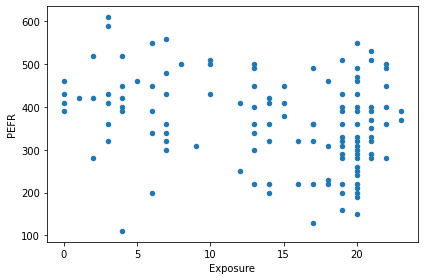

In [4]:
lung = pd.read_csv("../data/LungDisease.csv")

lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

In [5]:
predictors = ["Exposure"]
outcome = "PEFR"

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


### Fitted Values and Residuals

In [7]:
fitted = model.predict(lung[predictors])
residual = lung[outcome] - fitted

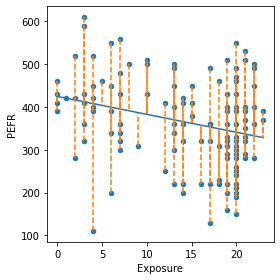

In [9]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

## Multiple Linear Regression

When we have more than one predictors, the regression equation can be written as follows:

$$
Y = b_0 + b_1X_1 + b_2X_2 + ... + b_pX_p + \epsilon
$$

In [12]:
# king county housing data
house = pd.read_csv("../data/house_sales.csv", sep='\t')

subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [13]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [18]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240793
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.84039832106
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898081


### Assessing the Model

The most important metric to evaluate regression models is the **Root Mean Squared Error** (RMSE).

$$
RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
$$

It measures the overall accuracy of the model. Another useful metric is the **Residual Standard Error** (RSE), which is computed similarly but it considers the degree of freedoms of the model.

$$
RSE = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n-p-1}}
$$

Another useful metric is the coefficient of determination, or **R-squared** statistics. It ranges from 0 to 1 and measures the proportion of variation in the data explained by the model.

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y}_i)^2}
$$

Along with the estimated coeffients, we can also compute a t-statistic for each coefficient. This t-statistic is then used to perform a hypothesis test where the Null hypothesis is that the coefficient is 0.

In [23]:
import statsmodels.api as sm
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:52:34   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cross-Validation

Using a holdout set is important to measure the performance of the model on unseen data. However, we run the risk of sampling a biased holdout set. To mitigate such problem, we can employ Cross-Validation. 

The algoritm for k-fold cross-validation is as follows:

1. Set aside 1/k of the data as a holdout sample.
2. Train the model on the remaining data.
3. Apply (score) the model to the 1/k holdout, and record needed model assessment metrics.
4. Restore the first 1/k of the data, and set aside the next 1/k (excluding any records that got picked the first time).
5. Repeat steps 2 and 3.
6. Repeat until each record has been used in the holdout portion.
7. Average or otherwise combine the model assessment metrics.

### Model Selection and Stepwise Regression

Adding more variables, however, does not necessarily mean we have a better model. Statisticians use the principle of Occam’s razor to guide the choice of a model: all things being equal, a simpler model should be used in preference to a more complicated model.

Including additional variables always reduces RMSE and increases $R^2$ for the training data. Hence, these are not appropriate to help guide the model choice. One approach to including model complexity is to use the adjusted $R^2$:

$$
R_{adj}^2 = 1 - (1 - R^2)\frac{n-1}{n-P-1}\text{, where $n$ is the number of records and $P$ is the number of variables}
$$

Note that as n approaches infinity, the $R_{adj}^2 \rightarrow R^2$. Therefore, this is not a good option for large datasets. 

Nevertheless, we can use a metric called Akaike's Information Criteria, AIC, that penalizes adding terms to a model. In the case of regression, AIC has the form:

$$
AIC = 2P + n\log{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
$$

The goal is to find the model that minimizes the AIC. Alternative metrics are: 

- **AICc**: A version of AIC corrected for small sample sizes.
- **BIC** or Bayesian Information Criteria: Similar to AIC, with a stronger penalty for including additional variables to the model.
- **Mallows Cp**: A variant of AIC developed by Colin Mallows.

In particular:

$$
BIC = P\log{n} + n\log{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
$$

## Prediction Using Regression

In regression, we can comput the t-statistics and p-value for individual regressors. More useful metrics are confidence intervals. They can be computed for **regression parameters** (coefficients), and even for **individual predictions** or regression model error.

### Confidence Interval for predictors (parameters)

The step by step procedure to build confidence interval for a regression parameter is:

1. Consider each row (including outcome variable) as a single "ticket" and place all the n tickets in a box.
2. Draw a ticket at random, record the values, and replace it in the box.
3. Repeat step 2 n times; you now have one bootstrap resample.
4. Fit a regression to the bootstrap sample, and record the estimated coefficients.
5. Repeat steps 2 through 4, say, 1,000 times.
6. You now have 1,000 bootstrap values for each coefficient; find the appropriate percentiles for each one (e.g., 5th and 95th for a 90% confidence interval).

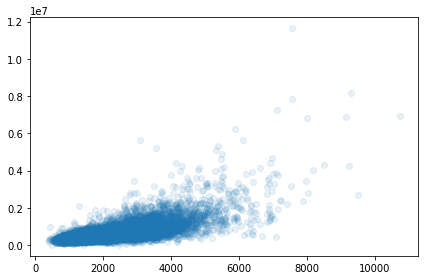

In [35]:
predictors = "SqFtTotLiving"
outcome = "AdjSalePrice"

fig, ax = plt.subplots(1, 1)

ax.scatter(house[predictors], house[outcome], alpha=0.1)

plt.tight_layout()
plt.show()

In [68]:
# 95% confidence interval for the SqFtTotLiving predictor
from sklearn.utils import resample
n_records = house.shape[0]

n_samples = 2000
n_bootstrap_samples = 1000
estimated_coefficients = []
for nrepeat in range(n_bootstrap_samples):
    sample = resample(house[[predictors, outcome]], n_samples=n_samples)
    
    house_lm = LinearRegression()
    house_lm.fit(np.array(sample[predictors]).reshape(-1, 1), sample[outcome])
    
    estimated_coefficients.append(house_lm.coef_)
    
estimated_coefficients = pd.Series([coef[0] for coef in estimated_coefficients])
avg_coef = estimated_coefficients.mean()
lower_bound, upper_bound = estimated_coefficients.quantile([0.025, 0.975])

print(f"Mean coefficient value for SqFtTotLiving: {avg_coef:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Mean coefficient value for SqFtTotLiving: 292.25
95% Confidence Interval: [255.94, 340.63]


In [66]:
# Coefficient computed using all the data
model = LinearRegression().fit(np.array(house[predictors]).reshape(-1, 1), house[outcome])
model.coef_

array([293.20271358])

### Confidence interval for predictions (regression model error)

The step by step procedure to build confidence interval for individual predictions is:

1. Take a bootstrap sample from the data (spelled out in greater detail earlier).
2. Fit the regression, and predict the new value.
3. Take a single residual at random from the original regression fit, add it to the predicted value, and record the result.
4. Repeat steps 1 through 3, say, 1,000 times.
5. Find the 2.5th and the 97.5th percentiles of the results.